In [30]:
# Malaria Detection using Transfer Leraning Technique

In [31]:
# Step 1:
# Importing the required Libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [32]:
# Before creating and executing the model let's check the version of directories.
import tensorflow
import keras
tensorflow.__version__, keras.__version__

('2.3.0', '2.4.3')

In [33]:
#  Re-sizeing all the images into a fixed and predefined size i.e. (244x244)
IMAGE_SIZE = [224,224]

In [34]:
tarin_path = 'Malaria_Detection_Dataset/Train'
test_path = 'Malaria_Detection_Dataset/Test'

In [35]:
# Import the Vgg16 Library as shown below and add preprocessing layer to the frequency
# Here we will be using imagenet weights
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [36]:
# Let's check the summary of the VGG19 model
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [37]:
# Transfer Leraning Technique
# We are not train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [38]:
# useful for getting number of classes
folders = glob('Malaria_Detection_Dataset/Train/*')

In [39]:
# Our Flatten layers: User can add more if they want to add
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [40]:
# Creating a initialized model object
model = Model(inputs=vgg.input, outputs=prediction)

In [41]:
# To view the structure of the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [42]:
# Applying the loss function and optimizer to the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [43]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

In [44]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Malaria_Detection_Dataset/Train', target_size = (224, 224),
                                                 batch_size = 32, class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Malaria_Detection_Dataset/Test', target_size = (224, 224),
                                            batch_size = 32, class_mode = 'categorical')


Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [45]:
# Let's fitting the model to the dataset
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
13/13 [==============================] - 222s 17s/step - loss: 1.4461 - accuracy: 0.5264 - val_loss: 0.7384 - val_accuracy: 0.5299
Epoch 2/5
13/13 [==============================] - 253s 19s/step - loss: 0.5117 - accuracy: 0.7380 - val_loss: 0.4905 - val_accuracy: 0.7612
Epoch 3/5
13/13 [==============================] - 229s 18s/step - loss: 0.4120 - accuracy: 0.8221 - val_loss: 0.4640 - val_accuracy: 0.7015
Epoch 4/5
13/13 [==============================] - 228s 18s/step - loss: 0.3733 - accuracy: 0.8341 - val_loss: 0.4240 - val_accuracy: 0.8284
Epoch 5/5
13/13 [==============================] - 230s 18s/step - loss: 0.3075 - accuracy: 0.8990 - val_loss: 0.4316 - val_accuracy: 0.7985


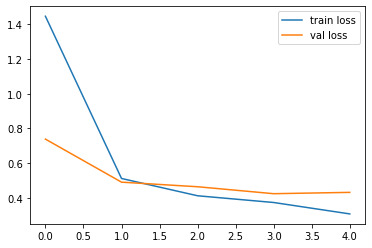

<Figure size 432x288 with 0 Axes>

In [46]:
# plot the loss function
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

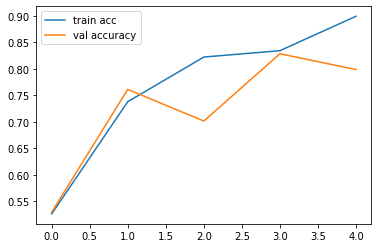

<Figure size 432x288 with 0 Axes>

In [47]:
# plot the accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# Let's save the model for future reference
import tensorflow
from keras.models import load_model
model.save('model_vgg19.h5')

In [50]:
# Predict the test results using the model
y_pred = model.predict(test_set)
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('model_vgg19.h5')

In [52]:
img=image.load_img('Malaria_Detection_Dataset/Test/Uninfected/MDTestU (12).png',target_size=(224,224))
x=image.img_to_array(img)
x
x.shape

(224, 224, 3)

In [53]:
# Reshape and preprocess the extracted values of the image
x = x/255
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [54]:
# Predicting the states of the test image
model.predict(img_data)
a = np.argmax(model.predict(img_data), axis=1)
if(a==1):
    print("Symptoms of Uninfected Conditions")
else:
    print("Symptoms of Infected Conditions")

Symptoms of Uninfected Conditions
